# Segmentation

## Create fake data

In [38]:
import pandas as pd
import numpy as np
from faker import Faker

def create_data(num_customers=1000):
    fake = Faker()
    np.random.seed(42)
    
    customer_data = []
    
    for _ in range(num_customers):
        customer_id = fake.uuid4()
        
        # Categorical dimensions
        dim_1 = fake.random_int(min=1, max=5)
        dim_2 = fake.random_element(elements=('A', 'B', 'C', 'D', 'E'))
        dim_3 = fake.random_element(elements=('X', 'Y', 'Z'))
        
        # Count features
        features = [np.random.randint(0, 100) for _ in range(10)]
        
        # Calculate a random CLV value
        clv = round(np.random.uniform(100, 10000), 2)
        
        customer_data.append([
            customer_id,
            dim_1,
            dim_2,
            dim_3,
            clv
        ] + features)
    
    columns = ['customer_id', 'dim_1', 'dim_2', 'dim_3', 'clv'] + [f'feature_{i+1}' for i in range(10)]
    return pd.DataFrame(customer_data, columns=columns)

# Generate the data
data = create_data()

# Create columns for recency and frequency for each feature
new_columns = []
for i in range(1, 11):
    feature = f'feature_{i}'
    data[f'{feature}_recency'] = data[feature]  # Assuming recency is just the feature value for simplicity
    data[f'{feature}_frequency'] = data[feature]  # Assuming frequency is just the feature count
    new_columns.extend([f'{feature}_recency', f'{feature}_frequency'])

# Select only the required columns: customer_id, categorical dimensions, CLV, and new feature columns
columns_to_keep = ['customer_id', 'dim_1', 'dim_2', 'dim_3', 'clv'] + new_columns
data = data[columns_to_keep]

# Display the updated DataFrame
data

,customer_id,dim_1,dim_2,dim_3,clv,feature_1_recency,feature_1_frequency,feature_2_recency,feature_2_frequency,feature_3_recency,...,feature_6_recency,feature_6_frequency,feature_7_recency,feature_7_frequency,feature_8_recency,feature_8_frequency,feature_9_recency,feature_9_frequency,feature_10_recency,feature_10_frequency
0,17588e82-307b-406e-b91f-8d225bd2a3ff,2,A,X,8675.14,51,51,92,92,14,...,20,20,82,82,86,86,74,74,74,74
1,3de42d1d-f9e2-4368-99f4-591dc7faf183,2,D,X,1900.07,99,99,23,23,2,...,1,1,87,87,29,29,37,37,1,1
2,430a283e-afbd-4fc1-bd99-21bda2d16728,1,D,Z,561.99,20,20,32,32,75,...,88,88,48,48,90,90,58,58,41,41
3,297f6449-c287-4724-9f32-2419d44e00c4,4,D,Z,4720.95,59,59,79,79,14,...,46,46,61,61,50,50,54,54,63,63
4,4debccf6-8f98-4866-87d5-d1a5d153d7ef,1,C,Z,8103.13,50,50,6,6,20,...,17,17,3,3,88,88,59,59,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,57d0cb71-2546-4e96-90ad-770f2bcc3cd6,5,B,X,7343.63,57,57,62,62,27,...,99,99,42,42,36,36,65,65,16,16
996,236a4f82-df06-4db0-9eae-13d84bed30d4,3,B,Z,1085.01,84,84,60,60,8,...,60,60,79,79,15,15,1,1,71,71
997,c299d1f5-ddbd-4e0c-a9d8-cc4add3d61ac,5,B,Y,983.30,41,41,76,76,56,...,66,66,29,29,12,12,18,18,6,6
998,fe54e80e-66b2-43c2-ba32-7cafbd9d2a61,3,D,Z,8959.21,53,53,85,85,81,...,1,1,49,49,74,74,30,30,32,32


## Clustering on product usage data (preferences / needs)

### t-SNE and UMAP



/opt/anaconda3/envs/ds/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


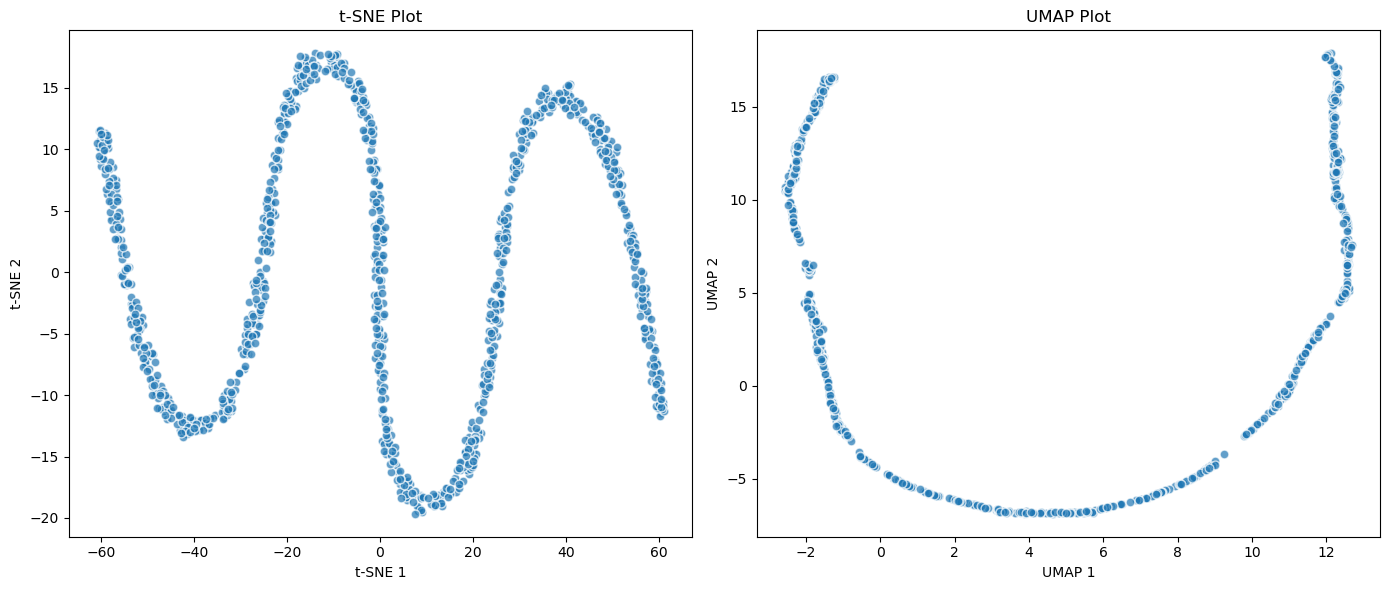

In [39]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

def plot(data):
    # Filter columns with 'feature' or 'clv' in their name
    feature_columns = [col for col in data.columns if 'feature' in col or 'clv' in col]
    features = data[feature_columns]
    
    # Fit and transform with t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    data_tsne = tsne.fit_transform(features)
    
    # Fit and transform with UMAP
    umap_model = umap.UMAP(n_components=2, random_state=42)
    data_umap = umap_model.fit_transform(features)
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot t-SNE
    axes[0].scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.7, edgecolors='w', s=40)
    axes[0].set_title('t-SNE Plot')
    axes[0].set_xlabel('t-SNE 1')
    axes[0].set_ylabel('t-SNE 2')
    
    # Plot UMAP
    axes[1].scatter(data_umap[:, 0], data_umap[:, 1], alpha=0.7, edgecolors='w', s=40)
    axes[1].set_title('UMAP Plot')
    axes[1].set_xlabel('UMAP 1')
    axes[1].set_ylabel('UMAP 2')
    
    plt.tight_layout()
    plt.show()

# Assuming 'data' is your DataFrame with the appropriate columns
plot(data)

### UMAP preprocessing

In [40]:
import pandas as pd
import umap

def umap_preprocessing(data, n=2):
    # Select columns that contain 'feature' or 'clv' in their names
    feature_columns = [col for col in data.columns if 'feature' in col or 'clv' in col]
    features = data[feature_columns]
    
    # Fit and transform the data using UMAP
    umap_model = umap.UMAP(n_components=n, random_state=42)
    umap_embeddings = umap_model.fit_transform(features)
    
    # Create column names for the UMAP embeddings
    umap_columns = [f'umap_embedding_{i+1}' for i in range(n)]
    
    # Create a DataFrame for the UMAP embeddings
    umap_df = pd.DataFrame(umap_embeddings, columns=umap_columns)
    
    # Append the UMAP embeddings to the original data
    data_with_umap = pd.concat([data.reset_index(drop=True), umap_df], axis=1)
    
    return data_with_umap

# Example usage
# Assuming 'data' is a DataFrame containing your dataset
data = umap_preprocessing(data, n=10)
data

/opt/anaconda3/envs/ds/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,customer_id,dim_1,dim_2,dim_3,clv,feature_1_recency,feature_1_frequency,feature_2_recency,feature_2_frequency,feature_3_recency,...,umap_embedding_1,umap_embedding_2,umap_embedding_3,umap_embedding_4,umap_embedding_5,umap_embedding_6,umap_embedding_7,umap_embedding_8,umap_embedding_9,umap_embedding_10
0,17588e82-307b-406e-b91f-8d225bd2a3ff,2,A,X,8675.14,51,51,92,92,14,...,12.586519,1.083296,4.560381,6.517859,3.929310,5.975357,4.408158,3.922051,4.361393,5.335275
1,3de42d1d-f9e2-4368-99f4-591dc7faf183,2,D,X,1900.07,99,99,23,23,2,...,-1.228573,2.369387,3.533107,6.114817,6.252700,5.503999,6.092257,3.813168,4.055644,4.811843
2,430a283e-afbd-4fc1-bd99-21bda2d16728,1,D,Z,561.99,20,20,32,32,75,...,-1.692909,-1.565470,7.933162,3.271048,6.036846,4.371794,5.094897,4.358546,5.294246,5.639682
3,297f6449-c287-4724-9f32-2419d44e00c4,4,D,Z,4720.95,59,59,79,79,14,...,4.381401,11.369623,5.079176,1.736145,3.804682,4.946759,4.813642,6.357911,4.489224,4.784349
4,4debccf6-8f98-4866-87d5-d1a5d153d7ef,1,C,Z,8103.13,50,50,6,6,20,...,12.577364,2.506006,6.614960,7.949419,3.290305,6.168405,5.261141,4.080331,4.835898,4.983221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,57d0cb71-2546-4e96-90ad-770f2bcc3cd6,5,B,X,7343.63,57,57,62,62,27,...,11.424923,5.276413,8.945210,8.316160,3.898965,5.897910,5.848538,4.409888,4.854467,5.041285
996,236a4f82-df06-4db0-9eae-13d84bed30d4,3,B,Z,1085.01,84,84,60,60,8,...,-1.302330,0.189579,5.863859,4.393060,6.094143,5.319590,5.859189,4.160919,4.509617,5.460657
997,c299d1f5-ddbd-4e0c-a9d8-cc4add3d61ac,5,B,Y,983.30,41,41,76,76,56,...,-1.456660,-0.289839,6.451974,4.072613,5.973446,5.090883,5.676306,4.312807,4.665026,5.611795
998,fe54e80e-66b2-43c2-ba32-7cafbd9d2a61,3,D,Z,8959.21,53,53,85,85,81,...,12.472422,0.554407,3.583565,5.838998,4.344468,5.835061,4.088295,4.128034,4.103424,5.521101


### DBSCAN Clustering

Best UMAP embeddings used: ['umap_embedding_1', 'umap_embedding_2', 'umap_embedding_3', 'umap_embedding_4', 'umap_embedding_5', 'umap_embedding_6', 'umap_embedding_7', 'umap_embedding_8', 'umap_embedding_9', 'umap_embedding_10']
Best eps: 0.6, Best min_samples: 3
Silhouette Score: 0.4793
Davies-Bouldin Index: 0.5844
Calinski-Harabasz Index: 840.8080
Optimal number of clusters: 5


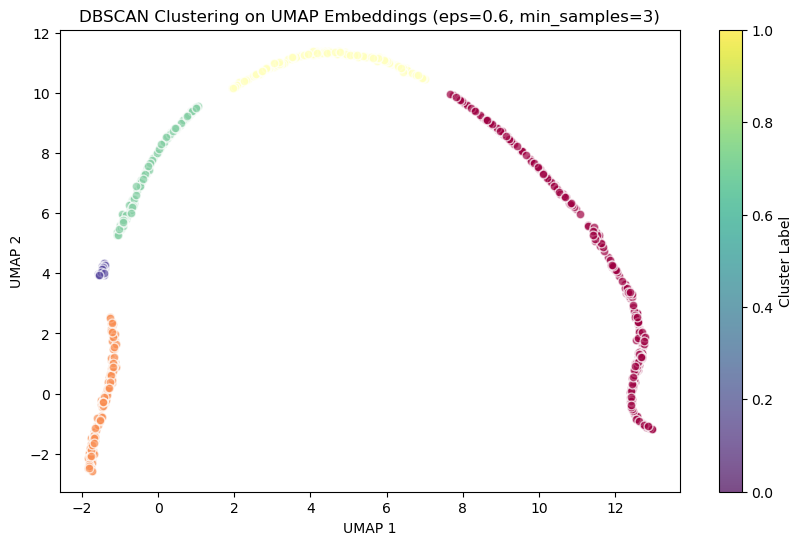

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def dbscan_clustering(data):
    """
    Applies DBSCAN clustering on UMAP embeddings and evaluates the clustering performance using Silhouette Score,
    Davies-Bouldin Index, and Calinski-Harabasz Index. Plots the clustering results on the first two UMAP embeddings.
    Returns the data with cluster labels.
    
    Parameters:
    data (pd.DataFrame): The input data containing UMAP embeddings.
    
    Returns:
    pd.DataFrame: The input data with an additional 'cluster' column indicating cluster labels.
    """
    # Select columns with 'umap_embedding' in their names
    umap_columns = [col for col in data.columns if 'umap_embedding' in col]
    
    best_score = float('-inf')
    best_model = None
    best_eps = None
    best_min_samples = None
    best_silhouette = None
    best_davies_bouldin = None
    best_calinski_harabasz = None
    best_clusters = None
    optimal_num_clusters = None
    
    # Iterate over different DBSCAN parameters to optimize clustering performance
    for eps in np.arange(0.1, 5.1, 0.5):
        for min_samples in range(3, 11):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(data[umap_columns])
            
            # Ignore if the number of clusters (excluding noise) is not between 2 and 5
            num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
            if num_clusters < 2 or num_clusters > 5:
                continue
            
            # Calculate evaluation metrics
            silhouette = silhouette_score(data[umap_columns], clusters)
            davies_bouldin = davies_bouldin_score(data[umap_columns], clusters)
            calinski_harabasz = calinski_harabasz_score(data[umap_columns], clusters)
            
            # Scalarize the three metrics into an objective function
            score = silhouette - davies_bouldin + calinski_harabasz
            
            # Update best model if current score is better
            if score > best_score:
                best_score = score
                best_model = dbscan
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette = silhouette
                best_davies_bouldin = davies_bouldin
                best_calinski_harabasz = calinski_harabasz
                best_clusters = clusters
                optimal_num_clusters = num_clusters
    
    # Print the best embeddings and scores
    print(f'Best UMAP embeddings used: {umap_columns}')
    print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}')
    print(f'Silhouette Score: {best_silhouette:.4f}')
    print(f'Davies-Bouldin Index: {best_davies_bouldin:.4f}')
    print(f'Calinski-Harabasz Index: {best_calinski_harabasz:.4f}')
    print(f'Optimal number of clusters: {optimal_num_clusters}')
    
    # Plot the best clustering on UMAP embeddings 1 and 2
    if best_clusters is not None:
        plt.figure(figsize=(10, 6))
        unique_labels = set(best_clusters)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
        
        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = [0, 0, 0, 1]  # Black for noise
            
            class_member_mask = (best_clusters == k)
            
            xy = data[class_member_mask]
            plt.scatter(xy['umap_embedding_1'], xy['umap_embedding_2'], c=[col], edgecolors='w', s=40, alpha=0.7)
        
        plt.title(f'DBSCAN Clustering on UMAP Embeddings (eps={best_eps}, min_samples={best_min_samples})')
        plt.xlabel('UMAP 1')
        plt.ylabel('UMAP 2')
        plt.colorbar(label='Cluster Label')
        plt.show()
        
        # Add the best clusters to the original data
        data['cluster'] = best_clusters
    else:
        print("No suitable clustering found with the given parameters.")
    
    return data

# Example usage
# Assuming 'data_with_umap' is a DataFrame containing your dataset with UMAP embeddings
data = dbscan_clustering(data)

## Segment summary

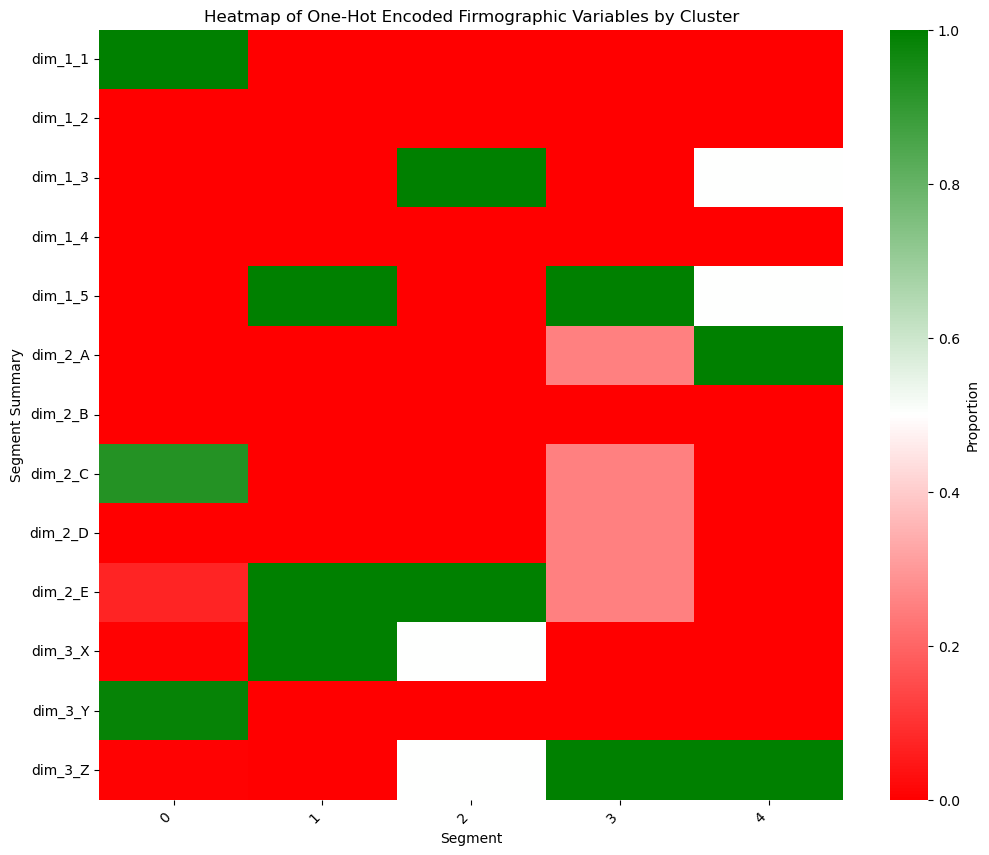

cluster,0,1,2,3,4
dim_1_1,9.999997e-01,2.834010e-05,6.073363e-20,3.242414e-30,9.893184e-18
dim_1_2,8.145658e-24,1.508719e-07,8.711948e-24,1.409965e-35,1.957502e-34
dim_1_3,2.530007e-07,8.031843e-10,9.999983e-01,3.575682e-22,5.000000e-01
dim_1_4,2.591359e-29,7.817919e-35,5.070914e-18,8.222790e-17,9.893184e-18
dim_1_5,6.478082e-25,9.999715e-01,1.718020e-06,1.000000e+00,5.000000e-01
dim_2_A,9.374952e-12,8.032072e-10,6.073374e-20,2.500000e-01,1.000000e+00
dim_2_B,3.750164e-16,2.758606e-30,2.057652e-08,3.524912e-36,1.187306e-117
dim_2_C,9.263307e-01,9.733654e-26,1.496735e-29,2.500000e-01,2.349247e-134
dim_2_D,9.374952e-12,2.276362e-14,6.073374e-20,2.500000e-01,3.032707e-84
dim_2_E,7.366927e-02,1.000000e+00,1.000000e+00,2.500000e-01,4.648306e-151


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def softmax(x, coldness=1.0):
    """
    Compute softmax values for each set of scores in x with an inverse temperature (coldness) parameter.
    Higher coldness makes assignments sharper.
    """
    e_x = np.exp(x * coldness)
    return e_x / e_x.sum(axis=0)

def one_hot_heatmap(data, coldness=1.0):
    """
    One-hot encodes all 'dim' variables (including numeric ones), applies softmax with coldness to each dimension,
    and creates a heatmap showing the average value of clusters for each one-hot encoded dim variable.
    
    Parameters:
    data (pd.DataFrame): The input data containing firmographic variables and cluster labels.
    coldness (float): The inverse temperature parameter for the softmax function. Higher values make assignments sharper.
    
    Returns:
    pd.DataFrame: The transposed DataFrame of average values by cluster.
    """
    # Select variables with 'dim' in their names
    dim_cols = [col for col in data.columns if 'dim' in col]
    
    # Convert all 'dim' variables to string to ensure one-hot encoding works correctly
    data[dim_cols] = data[dim_cols].astype(str)
    
    # One-hot encode the 'dim' variables
    X = pd.get_dummies(data[dim_cols])
    
    # Ensure all clusters are represented in the data
    if 'cluster' not in data.columns:
        raise ValueError("Cluster column not found in the dataset.")
    
    # Apply softmax with coldness to each dimension within each cluster
    X['cluster'] = data['cluster']
    one_hot_cluster_means = X.groupby('cluster').mean()
    
    for cluster in one_hot_cluster_means.index:
        cluster_data = one_hot_cluster_means.loc[cluster]
        dims = cluster_data.index.str.extract(r'^(.*)_')[0].unique()
        
        for dim in dims:
            subdims = cluster_data.filter(like=dim).index
            one_hot_cluster_means.loc[cluster, subdims] = softmax(cluster_data[subdims], coldness)
    
    # Transpose for better visualization
    one_hot_cluster_means = one_hot_cluster_means.transpose()
    
    # Create a custom green-to-white-to-red colormap
    colors = [(0, "red"), (0.5, "white"), (1, "green")]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    
    # Plot the heatmap using Seaborn
    plt.figure(figsize=(12, 10))
    sns.heatmap(one_hot_cluster_means, cmap=cmap, annot=False, fmt='.0%', cbar_kws={'label': 'Proportion'})
    plt.title('Heatmap of One-Hot Encoded Firmographic Variables by Cluster')
    plt.xlabel('Segment')
    plt.ylabel('Segment Summary')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.show()

    return one_hot_cluster_means

# Example usage
# Assuming 'data' is a DataFrame containing your dataset with firmographic variables and cluster labels
# Apply the function with a specified coldness
one_hot_cluster_means = one_hot_heatmap(data, coldness=1000.0)
one_hot_cluster_means